# IBM Peer Graded Assignment 

### Data - Banglore housing Data 
#### Source - https://www.kaggle.com/datasets/saipavansaketh/pune-house-data?select=Bangalore++house+data.csv

## *Description*
#### The dataset contains the price of the houses in banglore,India. The datasets gives us information on land area type, availability , size , no of bedrooms , society , area (sq ft) , no of balconys , no of bathrooms and the price in lakhs 
---
 


# *Objectives*
#### ->Data Preprocessing 
#### ->Feature engineering 
#### ->Train Test Split 
#### ->Build Linear , Lasso , Ridge and Elastic Net models 
#### ->Compare the r2 score for each of the models 
#### ->Conclude which model suits best for our dataset 
---

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Reading the Data 
data =  pd.read_csv("Bangalore  house data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Data Cleaning 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


<AxesSubplot:>

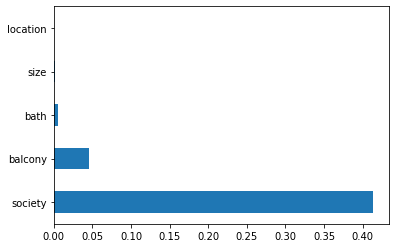

In [4]:
# finding out the number of null percentage in each columns
m = data.isnull().sum().sort_values(ascending=False)/len(data)
m[m!=0].plot(kind='barh')

Text(0.5, 1.0, '% of unique values in each col')

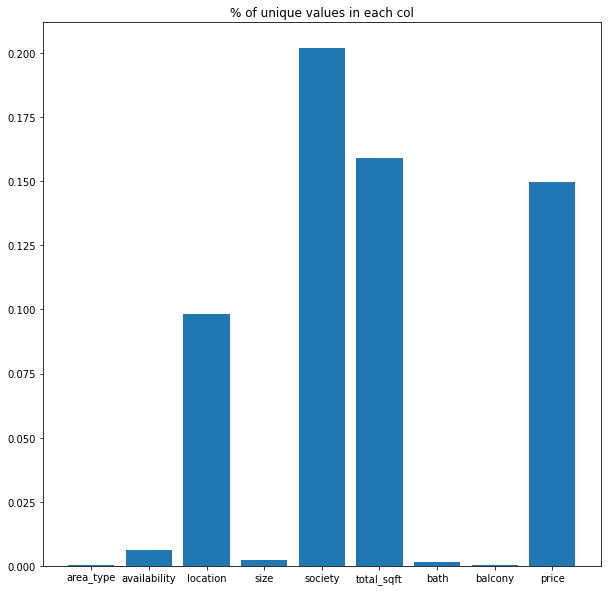

In [5]:
# Visualizing % of unique values in each col
no_of_uni_values_columns=[]
for col in data.columns:
    no_of_uni_values_columns.append(len(data[col].unique())/len(data))
plt.figure(figsize=(10,10))
plt.bar(data.columns,no_of_uni_values_columns)
plt.title("% of unique values in each col")

In [6]:
data.loc[30,'total_sqft']

'2100 - 2850'

In [6]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [7]:
def find_num(s):
    tf=0
    lst11=[]
    rlst=[]
    for i in range(0,len(data)):
        n=data.loc[i,s]
        if isfloat(n):
            tf+=1
        elif len(n)==11 and n!="45Sq. Yards" and n!="24Sq. Meter":
            lst11.append(i)
        else:
            rlst.append(i)
    return tf,lst11,rlst

In [8]:
tf,lst11,rlst=find_num('total_sqft')

In [9]:
print(data.loc[lst11,'total_sqft'])

30       2100 - 2850
56       3010 - 3410
81       2957 - 3450
122      3067 - 8156
137      1042 - 1105
            ...     
12990    1804 - 2273
13059    1200 - 1470
13240    1020 - 1130
13265    1133 - 1384
13299    2830 - 2882
Name: total_sqft, Length: 137, dtype: object


In [10]:
def convert11_num(l):
    for i in l:
        n=data.loc[i,'total_sqft']
        a=n[0:4]
        b=n[-4:]
        avg=float(a)+float(b)/2
        avg_str=str(avg)
        data.loc[i,'total_sqft']=avg_str 

In [11]:
convert11_num(lst11)

In [13]:
data.drop(rlst,axis=0,inplace=True)

In [17]:
data['total_sqft']=data['total_sqft'].astype('float64')

In [19]:
data[data['location'].isnull()].index.tolist()

[568]

In [23]:
data.drop([568],axis=0,inplace=True) 

In [25]:
m=data[data['size'].isnull()].index.tolist()
m

[579,
 1775,
 2264,
 2809,
 2862,
 5333,
 6423,
 6636,
 7680,
 8306,
 8565,
 8703,
 10634,
 11019,
 11569]

In [26]:
data.drop(m,axis=0,inplace=True) 

In [28]:
data['society']=data['society'].fillna('No Society')

In [31]:
def find_broom(s):
    emp_str=""
    for m in s:
        if m.isdigit():
            emp_str = emp_str + m
    return emp_str

In [35]:
data['size']=data['size'].apply(find_broom)
data['size']=data['size'].astype('float64')

In [40]:
m=data[data['balcony'].isnull()].index.tolist()
data.drop(m,axis=0,inplace=True) 
m=data[data['bath'].isnull()].index.tolist()
data.drop(m,axis=0,inplace=True) 

In [42]:
def avail(s):
    if s!="Ready To Move":
        s="Not Ready To Move"
    return s
data['availability'].apply(avail)

0        Not Ready To Move
1            Ready To Move
2            Ready To Move
3            Ready To Move
4            Ready To Move
               ...        
13314        Ready To Move
13315        Ready To Move
13317        Ready To Move
13318    Not Ready To Move
13319        Ready To Move
Name: availability, Length: 12610, dtype: object

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12610 non-null  object 
 1   availability  12610 non-null  object 
 2   location      12610 non-null  object 
 3   size          12610 non-null  float64
 4   society       12610 non-null  object 
 5   total_sqft    12610 non-null  float64
 6   bath          12610 non-null  float64
 7   balcony       12610 non-null  float64
 8   price         12610 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


## Feature Engineering 

In [43]:
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  

C:\Users\HRITHI~1\AppData\Local\Temp/ipykernel_21308/3339073334.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = data.dtypes[data.dtypes == np.object]


In [44]:
data = pd.get_dummies(data, columns=one_hot_encode_cols)

## Train Test Split 

In [47]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [51]:
feature_list=[]
for col in data.columns:
    if col!="price":
        feature_list.append(col)


In [53]:
X_train= train[feature_list]
Y_train= train["price"]

X_test= test[feature_list]
Y_test= test["price"]

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr_rmse=rmse(Y_test,lr.predict(X_test))

In [59]:
Y_test

8646     150.00
12036     62.00
2065      68.00
8476      75.00
9919      66.00
          ...  
3008      68.00
9404     300.00
9965      28.93
10891     39.29
3043      40.00
Name: price, Length: 3783, dtype: float64

In [57]:
print(lr_rmse)

100.46097194296561
